## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#display the head of the two data sets to make sure the path is working
#mouse_metadata_df.head()
#study_results_df.head()

# Combine the data into a single dataset called SCC_mice_studies
SCC_mice_studies_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID")

# Display the data table for preview
SCC_mice_studies_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_metadata_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
study_results_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [35]:
#SCC_mice_studies_df.describe()

In [36]:
# Checking the number of mice.
SCC_mice_studies_df["Mouse ID"].count()

1893

In [6]:
SCC_mice_studies_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [10]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

MeanTVolume = pd.DataFrame(round(SCC_mice_studies_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)'],2))
MeanTVolume = MeanTVolume.rename(columns={"Tumor Volume (mm3)":"Mean"})

MedianTVolume = pd.DataFrame(round(SCC_mice_studies_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],2))
MedianTVolume = MedianTVolume.rename(columns={"Tumor Volume (mm3)":"Median"})

VarianceTVolume = pd.DataFrame(round(SCC_mice_studies_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],2))
VarianceTVolume = VarianceTVolume.rename(columns={"Tumor Volume (mm3)":"Variance"})

SD_TVolume = pd.DataFrame(round(SCC_mice_studies_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],2))
SD_TVolume = SD_TVolume.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})

SEM_TVolume = pd.DataFrame(round(SCC_mice_studies_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],2))
SEM_TVolume = SEM_TVolume.rename(columns={"Tumor Volume (mm3)": "SEM"})

Summary_Stats = [MeanTVolume, MedianTVolume, VarianceTVolume, SD_TVolume, SEM_TVolume]
Summary_Stats = pd.concat(Summary_Stats, axis = 1)
Summary_Stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Stats_TVolume = pd.DataFrame(round(SCC_mice_studies_df.groupby(["Drug Regimen"]).describe()["Tumor Volume (mm3)"],2))
Stats_TVolume

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

EachTreat = SCC_mice_studies_df["Drug Regimen"].value_counts()
EachTreat

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

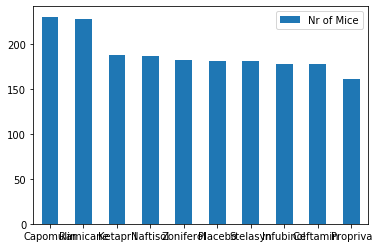

In [57]:
index = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin ", "Propriva"]
number_mice = [230, 228, 188, 186, 182, 181, 181,  178, 178, 161 ]
EachTreat_plot_df = pd.DataFrame({ "Nr of Mice": number_mice}, index=index)
EachTreat_plot_df
ax = EachTreat_plot_df.plot.bar(rot=0)

Text(0, 0.5, 'Number of Mice')

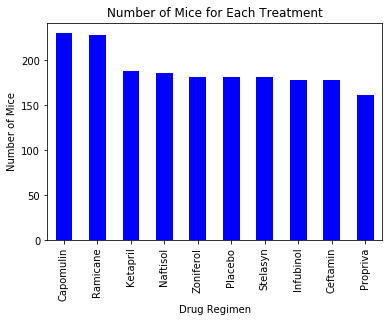

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
EachTreat_plot = EachTreat.plot(kind = "bar", facecolor = "blue")

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

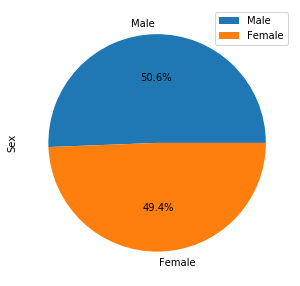

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Female_vs_Male = pd.DataFrame( SCC_mice_studies_df["Sex"].value_counts())
#Female_vs_Male
index = ["Male", "Female"]
Female_vs_Male_df = pd.DataFrame( SCC_mice_studies_df["Sex"].value_counts(), index = index)
plot = Female_vs_Male_df.plot.pie(y= "Sex", autopct="%1.1f%%", figsize=(5, 5))

/Users/lilianailut/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


([<matplotlib.patches.Wedge at 0x7fcde68ab8d0>,
 [Text(-0.020992503472585647, 1.0997996703027118, 'Male'),
  Text(0.02099250347258551, -1.0997996703027118, 'Female')],
 [Text(-0.011450456439592171, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592095, -0.5998907292560246, '49.4%')])

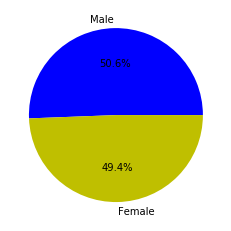

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate a pie plot showing the distribution of female versus male mice using pyplot
Female_vs_Male2 = pd.DataFrame(SCC_mice_studies_df["Sex"].value_counts())
labels = ["Male", "Female"]
colors = ["b","y"]
plt.pie(Female_vs_Male2, colors=colors, labels=labels, autopct="%1.1f%%", startangle= 360)

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin.
Capomulin = SCC_mice_studies_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Capomulin']                             
Capomulin = pd.DataFrame(Capomulin.groupby('Mouse ID')['Timepoint'].max())
Capomulin = Capomulin.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Capomulin = Capomulin.rename(columns = {'Tumor Volume (mm3)':'Capomulin'})

Ramicane = SCC_mice_studies_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Ramicane']
Ramicane = pd.DataFrame(Ramicane.groupby('Mouse ID')['Timepoint'].max())
Ramicane = Ramicane.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Ramicane = Ramicane.rename(columns = {'Tumor Volume (mm3)':'Ramicane'})

Infubinol = SCC_mice_studies_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Infubinol']                             
Infubinol = pd.DataFrame(Infubinol.groupby('Mouse ID')['Timepoint'].max())
Infubinol = Infubinol.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Infubinol = Infubinol.rename(columns = {'Tumor Volume (mm3)':'Infubinol'})

Ceftamin = SCC_mice_studies_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Ceftamin']                             
Ceftamin = pd.DataFrame(Ceftamin.groupby('Mouse ID')['Timepoint'].max())
Ceftamin = Ceftamin.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Ceftamin = Ceftamin.rename(columns = {'Tumor Volume (mm3)':'Ceftamin'})


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [25]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_quantiles = Capomulin['Capomulin'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quantiles[0.25]
Capomulin_upperq = Capomulin_quantiles[0.75]
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq
C_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
C_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

print("-------------------------------------------")
print(f'Capomulin IQR: {Capomulin_iqr}')
print(f"Values below {C_lower_bound} could be outliers.")
print(f"Values above {C_upper_bound} could be outliers.")
print("-------------------------------------------")

Ramicane_quantiles = Ramicane['Ramicane'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quantiles[0.25]
Ramicane_upperq = Ramicane_quantiles[0.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
R_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
R_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f'Ramicane IQR: {Ramicane_iqr}')
print(f"Values below {R_lower_bound} could be outliers.")
print(f"Values above {R_upper_bound} could be outliers.")
print("-------------------------------------------")

Infubinol_quantiles = Infubinol['Infubinol'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quantiles[0.25]
Infubinol_upperq = Infubinol_quantiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
I_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
I_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

print(f'Infubinol IQR: {Infubinol_iqr}')
print(f"Values below {I_lower_bound} could be outliers.")
print(f"Values above {I_upper_bound} could be outliers.")
print("-------------------------------------------")


Ceftamin_quantiles = Ceftamin['Ceftamin'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quantiles[0.25]
Ceftamin_upperq = Ceftamin_quantiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ce_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ce_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

print(f'Ceftamin IQR: {Ceftamin_iqr}')
print(f"Values below {Ce_lower_bound} could be outliers.")
print(f"Values above {Ce_upper_bound} could be outliers.")
print("-------------------------------------------")

-------------------------------------------
Capomulin IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------
Ramicane IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------
Infubinol IQR: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
-------------------------------------------
Ceftamin IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------------------


Text(0, 0.5, 'Tumor Volume')

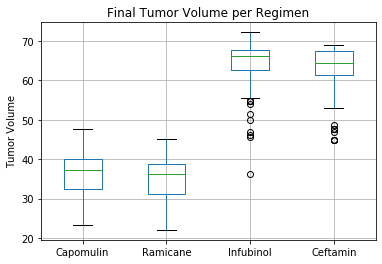

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume_df = Capomulin.merge(Ramicane, how = 'outer', on  = 'Timepoint')
tumor_volume_df = tumor_volume_df.merge(Infubinol, how = 'outer', on = 'Timepoint')
tumor_volume_df = tumor_volume_df.merge(Ceftamin, how = 'outer', on = 'Timepoint')
tumor_volume_df

boxplot_chart = tumor_volume_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
boxplot_chart.set_title('Final Tumor Volume per Regimen')
boxplot_chart.set_ylabel('Tumor Volume')

## Line and Scatter Plots

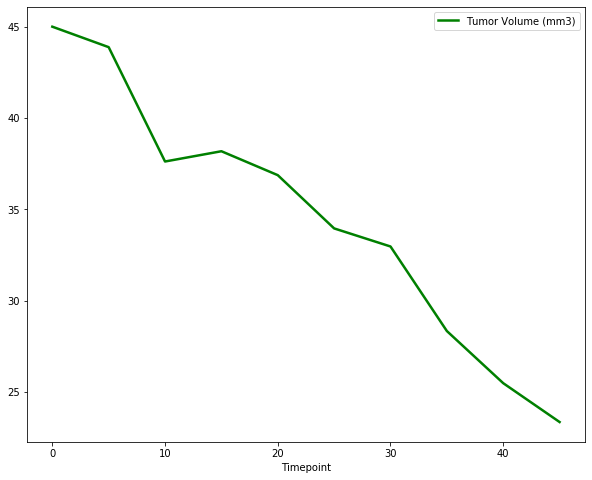

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = SCC_mice_studies_df.loc[SCC_mice_studies_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single_df = cap_single_df.reset_index(drop=True)
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

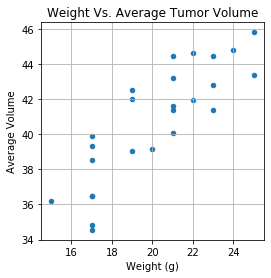

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


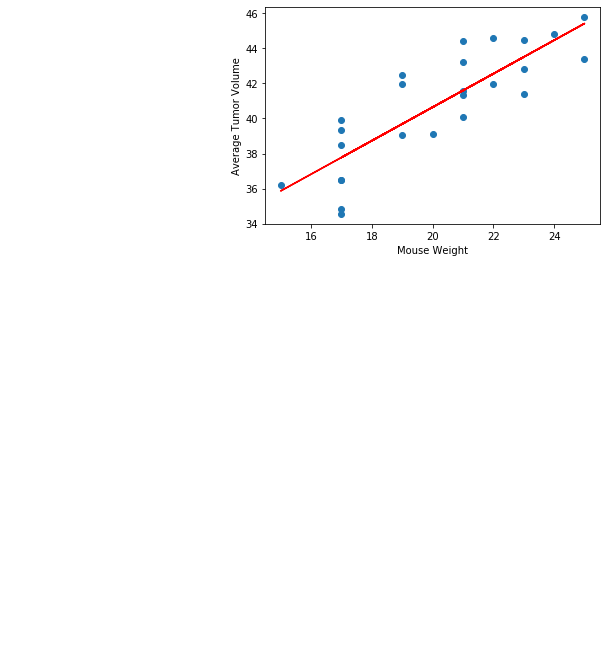

In [32]:
x_vals = average_cap['Weight (g)']
y_vals = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(6,10),fontsize=25,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()